In [1]:
import mnist
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

mndata = mnist.MNIST('mnist')
train_img, train_label = mndata.load_training()
test_img, test_label = mndata.load_testing()

train_images, train_labels = np.array(train_img, dtype=np.float64), np.array(train_label)
test_images, test_labels = np.array(test_img, dtype=np.float64), np.array(test_label)


In [2]:
train_img = []
train_label = []
for i in range(10):
    idx = np.where(train_labels == i)[0][:16]
    for j in idx:
        train_img.append(train_images[j])
        train_label.append(i)


train_img = np.array(train_img).reshape(-1, 28*28)
train_label = np.array(train_label)



test_img = []
test_label = []
for i in range(10):
    idx = np.where(test_labels == i)[0][:10]
    for j in idx:
        test_img.append(test_images[j])
        test_label.append(i)

test_img = np.array(test_img).reshape(-1, 28*28)
test_label = np.array(test_label)


compression_ratio_list = []

for i in range(1,100):
    pca_train = PCA(n_components=i)
    pca_train.fit(train_img)
    weights_train = pca_train.transform(train_img)

    pca_test = PCA(n_components=i)
    pca_test.fit(test_img)
    weights_test = pca_test.transform(test_img)

    compressed_size = weights_test.nbytes + test_img.shape[0] * pca_test.n_components * 4
    compression_ratio = test_img.nbytes / compressed_size
    compression_ratio_list.append(compression_ratio)


    

In [3]:
print(test_img.shape)

(100, 784)


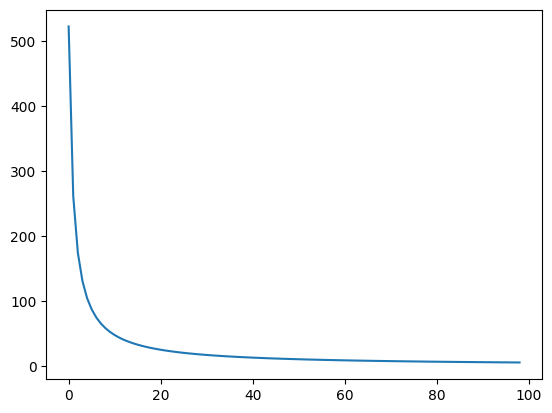

In [32]:
plt.plot(compression_ratio_list)
plt.savefig("./compression_ratio.png")
plt.show()


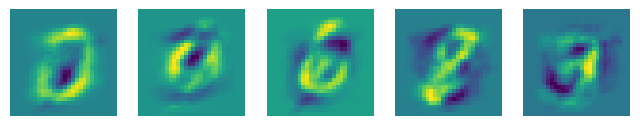

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca.fit(train_img)

eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
selected_eigenvectors = eigenvectors[:5]
 
images = np.reshape(selected_eigenvectors, (-1, 28, 28))


plt.figure(figsize=(8, 8))
for i in range(len(selected_eigenvectors)):
    plt.subplot(1, len(selected_eigenvectors), i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.savefig("./selected_eigenvectors")
plt.show()

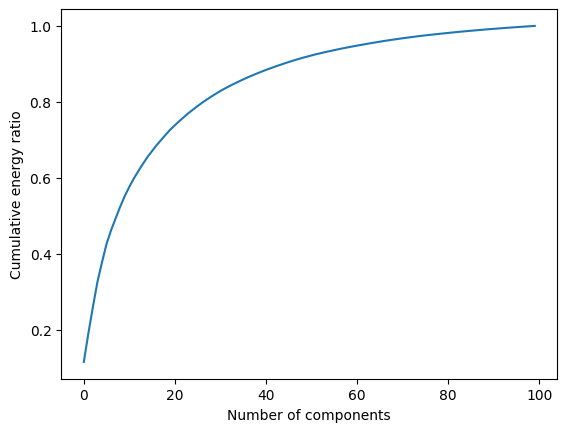

In [38]:
import numpy as np
import matplotlib.pyplot as plt

eigenvalues = pca.explained_variance_

total = np.sum(eigenvalues)

energy_ratios = eigenvalues / total

energy_ratios = np.cumsum(energy_ratios)

plt.plot(energy_ratios)
plt.xlabel('Number of components')
plt.ylabel('Cumulative energy ratio')
plt.savefig("./energy_ratios")
plt.show()

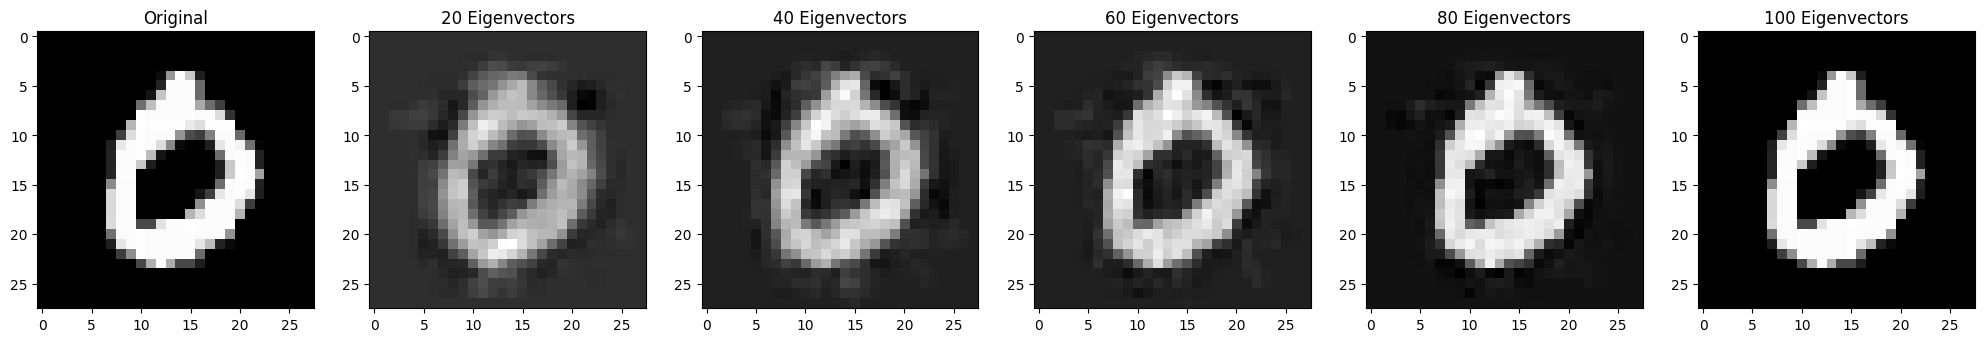

In [50]:
import matplotlib.pyplot as plt

num_eigenvectors = [20, 40, 60, 80, 100]


reconstructed_img = []

for n in num_eigenvectors:
    pca = PCA(n_components=n)
    pca.fit(test_img)
    
    weights = pca.transform(test_img)
    
    reconstructed = pca.inverse_transform(weights)
    reconstructed_img.append(reconstructed[0])
    
fig, ax = plt.subplots(1, 6, figsize=(25,8))
ax[0].imshow(test_img[0].reshape((28, 28)), cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(reconstructed_img[0].reshape((28, 28)), cmap='gray')
ax[1].set_title(f'20 Eigenvectors')
ax[2].imshow(reconstructed_img[1].reshape((28, 28)), cmap='gray')
ax[2].set_title(f'40 Eigenvectors')
ax[3].imshow(reconstructed_img[2].reshape((28, 28)), cmap='gray')
ax[3].set_title(f'60 Eigenvectors')
ax[4].imshow(reconstructed_img[3].reshape((28, 28)), cmap='gray')
ax[4].set_title(f'80 Eigenvectors')
ax[5].imshow(reconstructed_img[4].reshape((28, 28)), cmap='gray')
ax[5].set_title(f'100 Eigenvectors')

    
fig.savefig('reconstructed') 
plt.show()


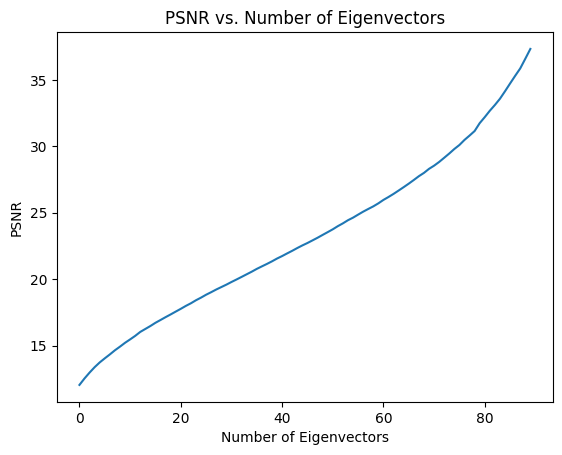

In [47]:
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    pixel_max = np.max(img1)
    psnr = 20 * np.log10(pixel_max / np.sqrt(mse))
    return psnr

n_components_list = [i for i in range(90)]

psnr_list = []

for n_components in n_components_list:

    pca = PCA(n_components=n_components)
    pca.fit(test_img)

    test_imgs_pca = pca.transform(test_img)
    test_imgs_reconstructed = pca.inverse_transform(test_imgs_pca)

    test_imgs_reconstructed = test_imgs_reconstructed.reshape(-1, 28, 28)
    test_imgs = test_img.reshape(-1, 28, 28)
    
    psnr = np.mean([calculate_psnr(test_imgs[i],test_imgs_reconstructed[i] ) for i in range(len(test_imgs))])
    psnr_list.append(psnr)

plt.plot(n_components_list, psnr_list,)
plt.title('PSNR vs. Number of Eigenvectors')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('PSNR')
plt.savefig("./PSNR")
plt.show()